
## 파이썬을 활용한 범주형 자료의 시각화 

- 시각화를 위한 파이썬 환경 준비 작업 
- 예제 1. 아파트 실거래가 데이터 : 범주형 변수의 시각화, 수치형 변수와 범주형 변수를 결합한 시각화 
- 예제 2. tips 데이터 : 시각화 응용

### 시각화를 위한 파이썬 환경 준비 작업

In [1]:
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Window의 경우 그래프의 한글 환경설정 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# Mac의 경우 그래프의 한글 환경설정 
# matplotlib.rc('font', family='AppleGothic') 

### 아파트 실거래가 데이터의 시각화

In [3]:
import pandas as pd
apt = pd.read_excel('data/아파트_실거래가_서울.xlsx')
apt.rename(columns = {'전용면적(㎡)' : '면적', '거래금액(만원)' : '가격'}, inplace = True)
apt['단가'] = apt.가격 / apt.면적
apt.columns

Index(['시군구', '번지', '본번', '부번', '단지명', '면적', '계약년월', '계약일', '가격', '층', '건축년도',
       '도로명', '시', '구', '동', '단가'],
      dtype='object')

- 막대그래프(barplot) : **25개**의 구

In [4]:
apt.구.value_counts().sort_values()

종로구      36
광진구      63
금천구      75
용산구      81
중구      100
동대문구    114
강북구     117
동작구     118
마포구     124
성동구     124
은평구     127
서대문구    133
관악구     135
중랑구     148
영등포구    152
강동구     160
양천구     167
송파구     174
도봉구     191
성북구     198
서초구     202
구로구     208
강남구     241
강서구     259
노원구     380
Name: 구, dtype: int64

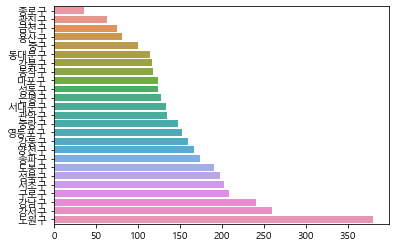

In [11]:
tb = apt.구.value_counts().sort_values() # tb.index : 구 이름, tb.values : 빈도수(frequency)
sns.barplot(y=tb.index, x = tb.values)
plt.show()

- 파이차트(pie chart)
     - seaborn에 현재 포함되어 있지 않으므로 matplotlib 활용 

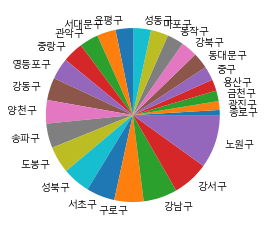

In [12]:
plt.pie(x=tb.values, labels=tb.index)
plt.show()

- 수치형 변수와 범주형 변수를 결합한 시각화

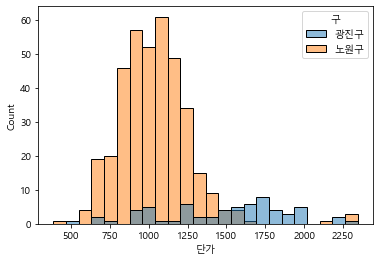

In [13]:
gj_nw = apt[apt.구.isin(['광진구', '노원구'])]
sns.histplot(data=gj_nw, x='단가', hue='구')
plt.show()

$\Rightarrow$ 두 지역에 관한 히스토그램을 겹쳐서 그리면 하나의 x, y축을 기준으로 그려지기 때문에 자료를 다른 각도에서 관찰할 수 있음 

$\Rightarrow$ 두 지역의 **단가의 분포 모양은 상이**하지만 **범위는 비슷**함. 자료에 포함되어 있는 **빈도수에 큰 차이**가 있음 

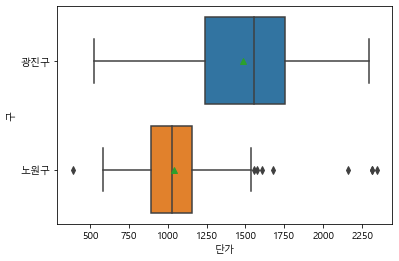

In [14]:
sns.boxplot(data=gj_nw, x='단가', y='구', showmeans=True)
plt.show()

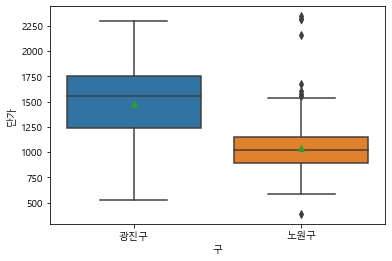

In [15]:
sns.boxplot(data=gj_nw, y='단가', x='구', showmeans=True) # x, y 를 바꿈 
plt.show()

$\Rightarrow$ 두 지역의 단가의 **분포 모양은 상이**하지만 **범위는 비슷**함. 하나의 그래프에 비교하고자 하는 지역 정보를 기준으로 상자그림을 따로, 하지만 하나의 그래프 안에 그려서 분포 비교 

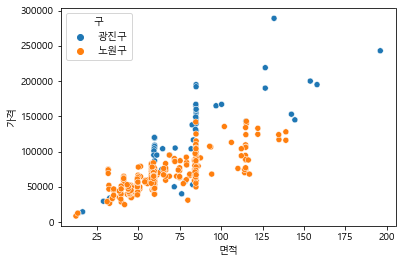

In [16]:
sns.scatterplot(data=gj_nw, x='면적', y='가격', hue='구')
plt.show()

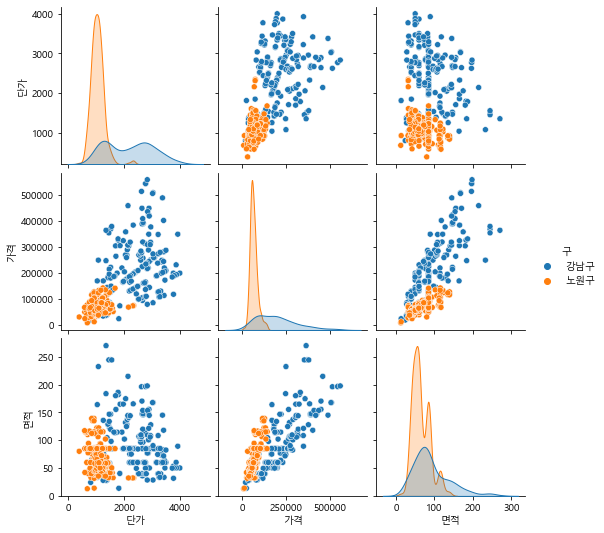

In [17]:
gn_nw = apt.loc[apt.구.isin(['강남구', '노원구']), ['구', '단가', '가격', '면적']]

sns.pairplot(gn_nw, hue="구")
plt.show()

### seaborn에 내장된 tips 데이터를 활용한 시각화의 응용 

In [18]:
tips = sns.load_dataset("tips")
tips.shape

(244, 7)

In [19]:
tips.head() # sex : 식사비를 지불하는 사람의 성별, smoker : 식사하는 일행 중 흡연자 여부, size : 식사 인원 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- 그룹별 tip의 분포를 상자그림으로 비교  

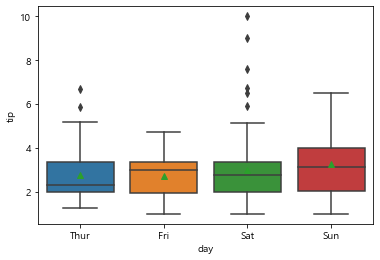

In [20]:
sns.boxplot(x="day", y="tip", data=tips, showmeans=True)
plt.show()

- 범주형 변수의 값에 따라 요약된 수치들을 바 그래프로 표현 

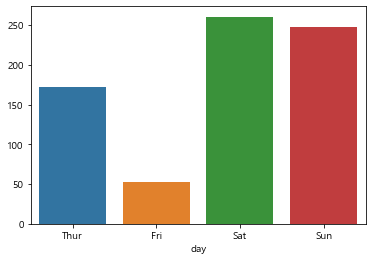

In [21]:
day_tip = tips.groupby('day').tip.sum()

sns.barplot(x= day_tip.index, y=day_tip.values) 

plt.show()

$\Rightarrow$ **금요일**의 경우 다른 요일에 비해 tip의 합이 적다는 것을 알 수 있음. **요일간 비교**를 쉽게 할 수 있음 

- 파이차트 

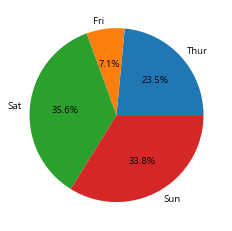

In [22]:
plt.pie(labels= day_tip.index, x=day_tip.values, autopct='%1.1f%%')
plt.show()

$\Rightarrow$ 요일별로 tip의 합이 차지하는 비율을 쉽게 파악할 수 있음 

- 요일별 tip의 히스토그램 

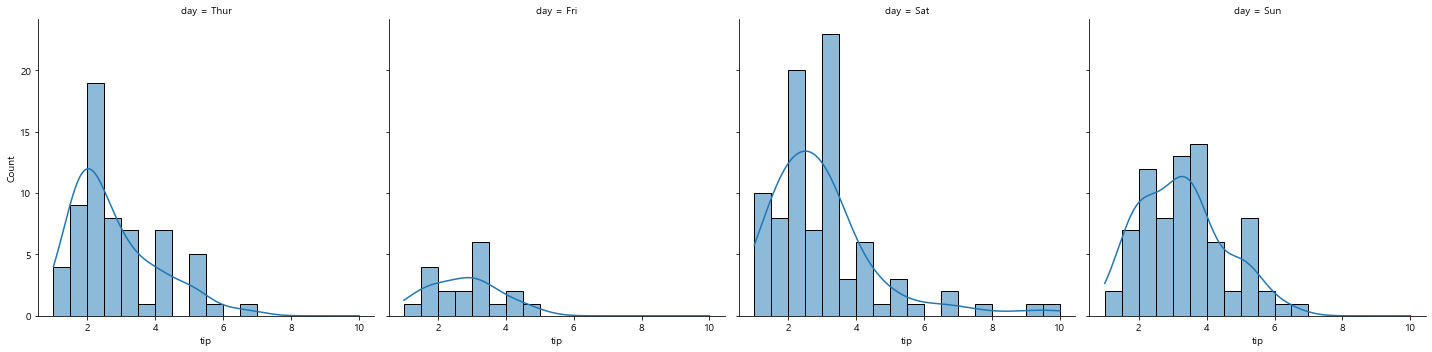

In [23]:
sns.displot(data=tips, x="tip", col="day", kde=True)
plt.show()

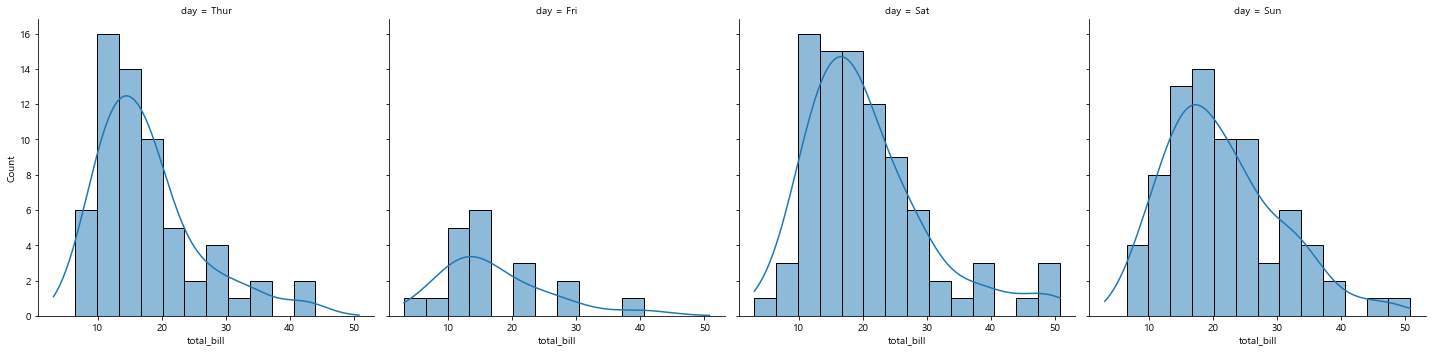

In [24]:
sns.displot(data=tips, x="total_bill", col="day", kde=True)
plt.show()

$\Rightarrow$ 요약된 하나의 수치가 아닌 전체 관측치를 **히스토그램**으로 표현함으로써 **전체적인 분포를 파악**할 수 있음

$\Rightarrow$ 합계가 적은 **금요일**의 경우 히스토그램을 비교했을 때 **건수가 적은** 것이 주요 이유라는 것을 알 수 있음

$\Rightarrow$ 자료에 포함된 모든 요일에서 tip과 total bill 변수 모두 **오른쪽으로 긴 꼬리가 있는 분포**를 가진다는 것을 알 수 있음  

- total bill과 tip의 산점도

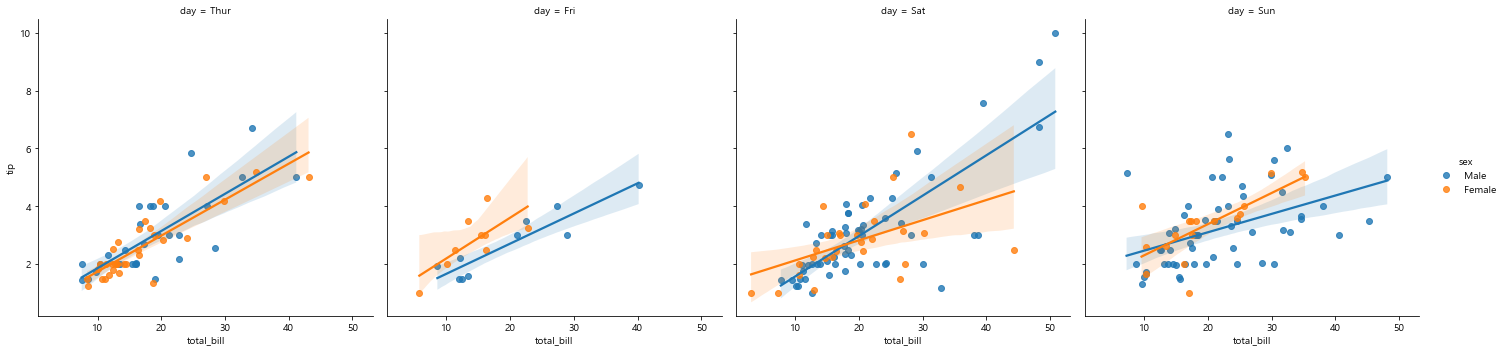

In [25]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="day", hue="sex")
plt.show()

$\Rightarrow$ 모든 경우에서 **우상향**하는 트렌드를 보여줌. 성별에 따라 기울기가 두드러지게 차이가 나는 요일은 토, 일요일이고 두 날짜에서 기울기 크기의 순서가 다르다는 재미있는 사실도 발견할 수 있음